# Лабораторная работа №2.1 "Опыт Франка-Герца"

<center>
    Методом электронного возбуждения измеряется энергия первого уровня атома гелия в динамическом и статистическом режиме.
</center>

### Динамический режим

По пикам определим энергию:

In [1]:
# [4 В, 6 В, 8 В]
E_max = {'up': [16, 15.5, 15], 'down': [17, 15.75, 15.9]}
E_min = {'up': [16, 16.25, 17], 'down': [17.25, 17.25, 19.5]}

In [2]:
def get_mean_E(E_max, E_min):
    import numpy as np
    return np.mean(np.concatenate((E_max['up'], E_max['down'], E_min['up'], E_max['down'])))

In [3]:
E_expected = get_mean_E(E_max, E_min)
E_expected

16.087500000000002

Итак, мы ожидаем энергию $E = 16.09$ эВ.

## Статический режим

Считаем данные

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [5]:
df = pd.read_csv('vah_static.csv', delimiter=';', dtype=np.float)

In [6]:
df.head()

,V_0,V,I
0,4.0,0.00,1.0
1,4.0,2.19,6.0
2,4.0,4.82,12.0
3,4.0,6.67,17.0
4,4.0,7.93,21.0


##### 4 вольта

In [7]:
x, y = df.V[df.V_0 == 4], \
        df.I[df.V_0 == 4]*5 # 1 деление прибора было 5 мА
# Сортируем
y = y[x.argsort()]
x = np.sort(x)
E = []

In [8]:
def paint_dots(*args, **kwargs):
    fig, ax = plt.subplots()
    for i in args:
        x_data, y_data = i['x'], i['y']
        
        if('isScatter' in i):
            is_scatter = i['isScatter']
        else:
            is_scatter = True
        
        if('label' in i):
            label = i['label']
        else:
            label = 'Graph'
        
        if('x_label' in i):
            x_label = i['x_label']
        else:
            x_label = r'$V$, В'
        
        if('y_label' in i):
            y_label = i['y_label']
        else:
            y_label = r'$I$, мА'
            
        if is_scatter:
            ax.scatter(x_data, y_data, label=label)
        else:
            ax.plot(x_data, y_data, label=label)
    
    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    # Ставим title
    if('title' in kwargs):
        ax.set_title(kwargs['title'])
    else:
        ax.set_title('ВАХ')
    
    # Сохраняем график
    if('filename' in kwargs):
        fig.savefig(kwargs['filename'])
    else:
        fig.savefig('out1.pdf')

In [9]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(x, y)
cs_deriv_roots = cs.derivative().roots()

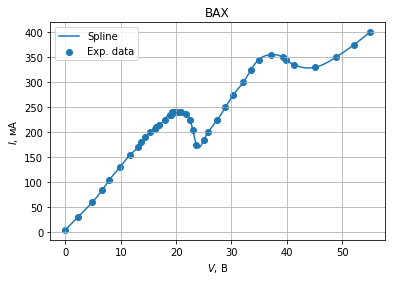

In [10]:
x_spline = np.linspace(x[0], x[-1], 1000)
paint_dots(
    {'x': x, 'y': y, 'isScatter': True, 'label': r'Exp. data'}, 
    {'x': x_spline, 'y': cs(x_spline), 'isScatter': False, 'label': r'Spline'},
    filename='4v.pdf'
)

Экстремумы (и шумы, кажущиеся экстремумами) приходятся на точки

In [11]:
print(cs_deriv_roots)

[18.71232306 18.93502767 19.41592136 19.9718728  20.50574638 24.06421498
 37.59476139 43.91248945]


In [12]:
# Массив для ошибок, потом пригодится
errors = []

Разность между минимумами дает:

In [13]:
E_by_min = 43.912 - 24.064
E_by_min

19.848

Разность между максимумами дает:

In [14]:
E_by_max = 37.595 - 19.41
E_by_max

18.185

Среднее между разностями:

In [15]:
E_mean = 0.5*(E_by_max + E_by_min)
E.append(E_mean)
errors.append(np.sqrt((E_mean - E_by_min)**2 + (E_mean - E_by_max)**2))
E_mean

19.0165

#### 6 вольт

In [16]:
x, y = df.V[df.V_0 == 6], \
        df.I[df.V_0 == 6]*5 # 1 деление прибора было 5 мА
# Сортируем
y = y[x.argsort() + x.index[0]]
x = np.sort(x)

In [17]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(x, y)
cs_deriv_roots = cs.derivative().roots()

cs = UnivariateSpline(x, y, s=100)

.  [20.16756264 21.70405693 22.46776868 25.11440481 37.79214932 46.27838961
 65.12190644]


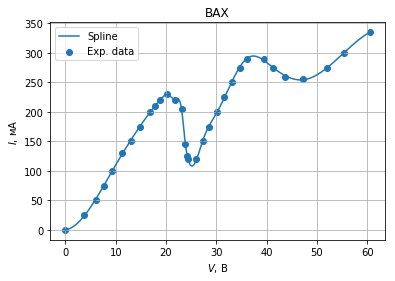

In [18]:
x_spline = np.linspace(x[0], x[-1], 1000)
paint_dots(
    {'x': x, 'y': y, 'isScatter': True, 'label': r'Exp. data'}, 
    {'x': x_spline, 'y': cs(x_spline), 'isScatter': False, 'label': r'Spline'},
    filename='6v.pdf'
)

print('. ',cs_deriv_roots)

In [19]:
E_by_min = 46.27 - 25.11
E_by_max = 37.79 - 20.17
E_mean = 0.5*(E_by_min + E_by_max)
E.append(E_mean)

errors.append(np.sqrt((E_mean - E_by_min)**2 + (E_mean - E_by_max)**2))
E_mean

19.39

#### 8 вольт

.  [ 1.76535706 19.76893443 22.29645059 23.63285641 24.59416862 24.79320911
 26.23940735 38.31659222 49.01185927 64.38899786]


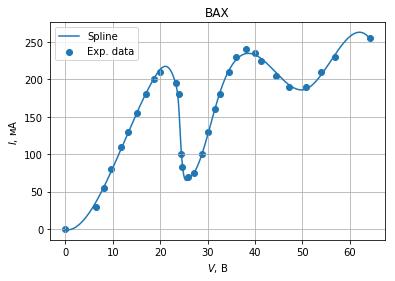

In [20]:
x, y = df.V[df.V_0 == 8], \
        df.I[df.V_0 == 8]*5 # 1 деление прибора было 5 мА
# Сортируем
y = y[x.argsort() + x.index[0]]
x = np.sort(x)

from scipy.interpolate import UnivariateSpline

cs_cubic = CubicSpline(x, y)

cs = UnivariateSpline(x, y, s=1000)
cs_deriv_roots = cs.derivative()

x_spline = np.linspace(x[0], x[-1], 1000)
paint_dots(
    {'x': x, 'y': y, 'isScatter': True, 'label': r'Exp. data'}, 
    {'x': x_spline, 'y': cs(x_spline), 'isScatter': False, 'label': r'Spline'},
    filename='8v.pdf'
)

print('. ',cs_cubic.derivative().roots())

In [21]:
E_by_min = - (24.79 - 49.01)
E_by_max = 38.32 - 24.79
E_mean = 0.5*(E_by_min + E_by_max)
E.append(E_mean)

errors.append(np.sqrt((E_mean - E_by_min)**2 + (E_mean - E_by_max)**2))
E_mean

18.875

Оценим погрешности:

In [22]:
d_E_mean = np.sqrt(np.sum(np.array(errors)**2))/4
E_mean = np.mean(E)
d_E_mean

2.0122536262235933

Оценка относительной статистической погрешности:

In [23]:
print(r'  E = ({0:.2f} ± {1:.2f}) эВ'.format(E_mean, float(d_E_mean)))

  E = (19.09 ± 2.01) эВ


Итак, энергия возбуждения составила $E = (19.09 \pm 2.01)$ эВ

In [24]:
print('  ∆E/E = {0:.2f}%'.format(d_E_mean/E_mean*100))

  ∆E/E = 10.54%


Погрешности приборов были порядка 1%, поэтому их можно не учесть в конеченой оценке погрешности.

Итоговая погрешность двух измерений будет 

In [25]:
print('  Относительная погрешность в результатах, полученных двумя способами, в процентах: {0:.2f}%'.format((E_mean - E_expected) / E_mean * 100))

  Относительная погрешность в результатах, полученных двумя способами, в процентах: 15.75%


## Выводы

<ol>
    <li> Убедились в дискретности спектра гелия </li>
    <li> Уведели отклонение поведения ВАХ от классической модели </li>
    <li> Определили энергию возбуждения атома гелия </li>
</ol>